In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import codecs
from tabulate import tabulate
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from num2words import num2words
nltk.download('words')  # Ensure NLTK words corpus is downloaded

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Task 1: Data exploration and Sampling

In [58]:
# Function to read text files safely
def read_text_file(file_path):
    with codecs.open(file_path, 'r', encoding='utf-8') as file:
        sentences = file.readlines()
    return sentences

# Function to calculate most frequent word
def most_frequent_word(text):
    words = text.split()
    word_freq = Counter(words)
    return word_freq.most_common(1)[0][0]

# Function to calculate unique words count
def count_unique_words(text):
    words = text.split()
    return len(set(words))

# Function to calculate numeral frequencies
def count_numerals(text):
    numeral_count = Counter(char for char in text if char.isdigit())
    return numeral_count

# File paths
en_file_path = 'de-en/europarl-v7.de-en.en'  # English language file
de_file_path = 'de-en/europarl-v7.de-en.de'  # German language file

# Read the files
en_sentences = read_text_file(en_file_path)
de_sentences = read_text_file(de_file_path)

# Create a DataFrame
df = pd.DataFrame({'en': en_sentences, 'de': de_sentences})

In [59]:
# Randomly select 10% of the data
df_sampled = df.sample(frac=0.10, random_state=42)

## Stats

In [3]:
# Basic statistics
num_sentences = len(df)
en_lengths = df['en'].str.len()
de_lengths = df['de'].str.len()
length_diff = en_lengths - de_lengths

# Calculate total number of words, unique words, and average word length
def calculate_word_stats(text):
    words = text.split()
    num_words = len(words)
    unique_words = count_unique_words(text)
    avg_word_length = sum(len(word) for word in words) / num_words
    return num_words, unique_words, avg_word_length

en_num_words, unique_en_words, awl_en = calculate_word_stats(' '.join(df['en']))
de_num_words, unique_de_words, awl_de = calculate_word_stats(' '.join(df['de']))

# Calculate most frequent words
most_freq_word_en = most_frequent_word(' '.join(df['en']))
most_freq_word_de = most_frequent_word(' '.join(df['de']))

# Calculate numeral frequencies
numeral_freq_en = count_numerals(' '.join(df['en']))
numeral_freq_de = count_numerals(' '.join(df['de']))

# Summary statistics
summary_stats = [
    ['Number of sentences', num_sentences],
    ['Total words (English)', en_num_words],
    ['Total words (German)', de_num_words],
    ['Unique words (English)', unique_en_words],
    ['Unique words (German)', unique_de_words],
    ['Average word length (English)', awl_en],
    ['Average word length (German)', awl_de],
    ['Average sentence length (English)', en_lengths.mean()],
    ['Average sentence length (German)', de_lengths.mean()],
    ['Average sentence length difference (English - German)', length_diff.mean()],
    ['Most frequent word (English)', most_freq_word_en],
    ['Most frequent word (German)', most_freq_word_de],
    ['Numerals frequency (English)', numeral_freq_en],
    ['Numerals frequency (German)', numeral_freq_de]
]

# Print summary statistics
print(tabulate(summary_stats, headers=['Statistic', 'Value'], tablefmt='pretty'))

+-------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                       Statistic                       |                                                                                  Value                                                                                  |
+-------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                  Number of sentences                  |                                                                                 1920209                                                                                 |
|                 Total words (English)                 |                               

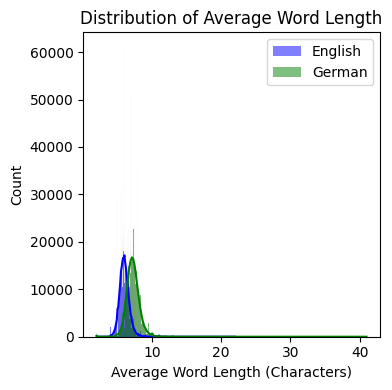

In [4]:
df['en_sentence_length'] = df['en'].str.len()
df['de_sentence_length'] = df['de'].str.len()

df['en_num_words'] = df['en'].str.split().apply(len)
df['de_num_words'] = df['de'].str.split().apply(len)

df['en_avg_word_length'] = df['en_sentence_length'] / df['en_num_words']
df['de_avg_word_length'] = df['de_sentence_length'] / df['de_num_words']

# Plotting with Seaborn
plt.figure(figsize=(4, 4))

# Distribution of Average Word Length
plt.subplot(1, 1, 1)
sns.histplot(df['en_avg_word_length'], kde=True, color='blue', label='English')
sns.histplot(df['de_avg_word_length'], kde=True, color='green', label='German')
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length (Characters)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# Task 2: Pre-processing

In [60]:
def write_files():
    # Specify the columns to be saved
    column1 = 'en'
    column2 = 'de'

    # Save the first column to file1.txt
    with open('en.txt', 'w', encoding='utf-8') as f1:
        for item in df_sampled[column1]:
            f1.write(f"{item}\n")

    # Save the second column to file2.txt
    with open('de.txt', 'w', encoding='utf-8') as f2:
        for item in df_sampled[column2]:
            f2.write(f"{item}\n")

    print("Columns have been saved to separate files.")

# Pre-process: Lowercase texts
df_sampled['en'] = df_sampled['en'].str.lower()
df_sampled['de'] = df_sampled['de'].str.lower()

# Function to remove lists of numbers separated by commas
def remove_number_lists(text):
    pattern = r'\b\d+(?:,\s*\d+)*\b'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Pre-process: Apply number removal and then remove punctuation
df_sampled['en'] = df_sampled['en'].apply(remove_number_lists)
df_sampled['de'] = df_sampled['de'].apply(remove_number_lists)

# Pre-process: Remove punctuation
df_sampled['en'] = df_sampled['en'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_sampled['de'] = df_sampled['de'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Pre-process: Strip empty lines and their correspondences
df_sampled = df_sampled[(df_sampled['en'].str.strip() != '') & (df_sampled['de'].str.strip() != '')]

# Pre-process: Remove unnecessary white spaces
df_sampled['en'] = df_sampled['en'].apply(lambda x: ' '.join(x.split()))
df_sampled['de'] = df_sampled['de'].apply(lambda x: ' '.join(x.split()))

# Function to apply regex substitution and remove extra whitespace before 3 or more zeroes
def remove_whitespace_before_numbers(text):
    text = re.sub(r'(\d)\s+(\d)', r'\1\2', text)
    return text

df_sampled['en'] = df_sampled['en'].apply(lambda x: remove_whitespace_before_numbers(x))
df_sampled['de'] = df_sampled['de'].apply(lambda x: remove_whitespace_before_numbers(x))


# Function to apply regex substitution
def remove_report_number(text):
    # Remove letter followed by digits
    text = re.sub(r'\b[a-z]\d+\b', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df_sampled['en'] = df_sampled['en'].apply(lambda x: remove_report_number(x))
df_sampled['de'] = df_sampled['de'].apply(lambda x: remove_report_number(x))

# Function to remove specific characters and replace special symbols
def remove_specific_characters(text, replacements):
    for key, value in replacements.items():
        text = text.replace(key, value)
    
    # Remove hyphens, „, and “ and other specified characters
    text = re.sub(r'[-„“‟”–…‘’´­•—‚‘υπέρœ―]', '', text) # [^a-zA-Z0-9\söêüíßèéäñćėøâòìçïčľţôńšúşåóáã]
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Define replacements for 'en' and 'de' separately
replacements_en = {
    'æ': 'ae',
    '½': 'one half',
    '¾': 'three quarters',
    '£': 'pound',
    '°': 'degree',
    '§': 'section'

}

replacements_de = {
    'æ': 'ae',
    '½': 'ein halb',
    '¾': 'drei viertel',
    '€': 'euro',
    '°': 'grad',
    '§': 'abschnitt'
}

# Apply preprocessing function to columns 'en' and 'de'
df_sampled['en'] = df_sampled['en'].apply(lambda x: remove_specific_characters(x.lower().translate(str.maketrans('', '', string.punctuation)), replacements_en))
df_sampled['de'] = df_sampled['de'].apply(lambda x: remove_specific_characters(x.lower().translate(str.maketrans('', '', string.punctuation)), replacements_de))

def convert_numbers_to_words(sentence, lang='en'):
    words = word_tokenize(sentence)
    converted_words = []
    for word in words:
        try:
            number = int(word)
            if 0 <= number <= 999999999:
                converted_word = num2words(number, lang=lang)
                converted_words.append(converted_word)
            else:
                converted_words.append(word)  # Append as is if out of range
        except ValueError:
            converted_words.append(word)
        except NotImplementedError:
            converted_words.append(word)  # Handle cases where num2words cannot convert
    return ' '.join(converted_words)

# Applying conversion for English and German
df_sampled['en'] = df_sampled['en'].apply(lambda x: convert_numbers_to_words(x, lang='en'))
df_sampled['de'] = df_sampled['de'].apply(lambda x: convert_numbers_to_words(x, lang='de'))

# Write the processed data to files
write_files()

# remove numbers having length bigger than 10 and move on


Columns have been saved to separate files.
